In [ ]:
# Created by: Jess Gallo
# Date Created: 09/20/2022
# Last Modified: 09/22/2022
# Description: Data Glacier Week 7

In [13]:
# Libraries
import pandas as pd
import seaborn as sns

In [3]:
# Import Dataset
filename = r'C:\Users\Gallo\Downloads\Healthcare_dataset.xlsx'

# sheet 1 name is 'Feature Description'
dataset = pd.read_excel(filename, sheet_name = 'Dataset')
df = pd.DataFrame(dataset)

df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

In [11]:
df.dtypes.unique()

array([dtype('O'), dtype('int64')], dtype=object)

# Missing Data

In [7]:
df.isnull().any()

Ptid                              False
Persistency_Flag                  False
Gender                            False
Race                              False
Ethnicity                         False
                                  ...  
Risk_Hysterectomy_Oophorectomy    False
Risk_Estrogen_Deficiency          False
Risk_Immobilization               False
Risk_Recurring_Falls              False
Count_Of_Risks                    False
Length: 69, dtype: bool

There is no missing data to clean.

# Outliers

C:\Users\Gallo\anaconda3\envs\GPUenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Count_Of_Risks'>

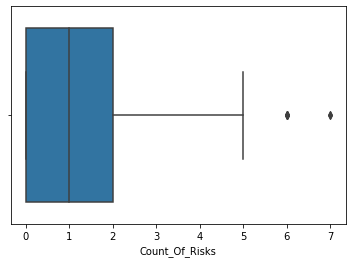

In [18]:
sns.boxplot(df['Count_Of_Risks'])

C:\Users\Gallo\anaconda3\envs\GPUenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dexa_Freq_During_Rx'>

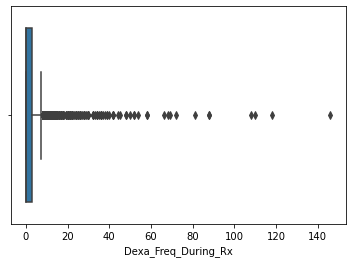

In [19]:
sns.boxplot(df['Dexa_Freq_During_Rx'])

# Skewness

In [20]:
# skewness along the index axis
df.skew(axis = 0, skipna = True)

C:\Users\Gallo\AppData\Local\Temp/ipykernel_16012/568673259.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew(axis = 0, skipna = True)


Dexa_Freq_During_Rx    6.808730
Count_Of_Risks         0.879791
dtype: float64

There cannot be skewness in this dataset since this is almost all categorical data

# Inconsistent Data Entry

Ran this code for each colunm to check for inconsistent data entry. None of the columns had spelling mistakes, duplicates, added spaces or different upper and lower cases.

In [47]:
# get all the unique values in the column
data = df['Ntm_Speciality'].unique()

# sort them alphabetically and then take a closer look
data.sort()
data

array(['CARDIOLOGY', 'CLINICAL NURSE SPECIALIST', 'EMERGENCY MEDICINE',
       'ENDOCRINOLOGY', 'GASTROENTEROLOGY', 'GENERAL PRACTITIONER',
       'GERIATRIC MEDICINE', 'HEMATOLOGY & ONCOLOGY',
       'HOSPICE AND PALLIATIVE MEDICINE', 'HOSPITAL MEDICINE',
       'NEPHROLOGY', 'NEUROLOGY', 'NUCLEAR MEDICINE',
       'OBSTETRICS & OBSTETRICS & GYNECOLOGY & OBSTETRICS & GYNECOLOGY',
       'OBSTETRICS AND GYNECOLOGY', 'OCCUPATIONAL MEDICINE', 'ONCOLOGY',
       'OPHTHALMOLOGY', 'ORTHOPEDIC SURGERY', 'ORTHOPEDICS',
       'OTOLARYNGOLOGY', 'PAIN MEDICINE', 'PATHOLOGY', 'PEDIATRICS',
       'PHYSICAL MEDICINE AND REHABILITATION', 'PLASTIC SURGERY',
       'PODIATRY', 'PSYCHIATRY AND NEUROLOGY', 'PULMONARY MEDICINE',
       'RADIOLOGY', 'RHEUMATOLOGY', 'SURGERY AND SURGICAL SPECIALTIES',
       'TRANSPLANT SURGERY', 'UROLOGY', 'Unknown', 'VASCULAR SURGERY'],
      dtype=object)